# TechNova Solutions: Employee Attrition Prediction

**Author**: `Lucy Tran`
**ID**: `0925769`

---

## Context
TechNova Solutions, a mid-sized IT services company, is experiencing a high employee attrition rate. This turnover increases costs, disrupts projects, and lowers team morale. The company needs a data-driven approach to understand and predict employee churn.

## Problem Statement
The current HR process for managing attrition is reactive. Efforts to retain employees begin only after they have resigned, making them largely ineffective. This project aims to build a proactive solution by developing a predictive model to identify employees at high risk of leaving. This will enable the HR department to implement targeted retention strategies, optimize resource allocation, and improve overall employee satisfaction.

## Objective
1.  **Analyze** the employee dataset to uncover the key factors influencing attrition.
2.  **Build** a predictive machine learning model to classify whether an employee is likely to leave.
3.  **Provide** actionable recommendations to help HR improve retention and employee satisfaction.

## Data Understanding
The dataset for this project is the "IBM HR Analytics Employee Attrition & Performance" dataset, which contains 1,470 employee records and 35 features. The data includes a mix of demographic, work-related, and personal information. The target variable is `Attrition`.

In [39]:

# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for machine learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve

# Import libraries for model explainability
import shap

# Set plot style
sns.set_style('whitegrid')

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [40]:
# Load the dataset
# Make sure the CSV file is in the same directory as your notebook
try:
    df = pd.read_csv('employee_churn_dataset.csv')
except FileNotFoundError:
    print("Error: 'employee_churn_dataset.csv' not found. Please ensure the file is in the correct directory.")
    # As a fallback for demonstration, create a dummy dataframe
    df = pd.DataFrame()

if not df.empty:
    # Display the first few rows
    print("First 5 rows of the dataset:")
    display(df.head())

    # Display basic information about the dataset
    print("\nDataset Information:")
    df.info()

    # Display summary statistics
    print("\nSummary Statistics:")
    display(df.describe())

    # Check for missing values
    print("\nMissing Values Count:")
    print(df.isnull().sum())

First 5 rows of the dataset:


,Employee ID,Age,Gender,Education Level,Marital Status,Tenure,Job Role,Department,Salary,Work Location,...,Training Hours,Promotions,Overtime Hours,Satisfaction Level,Work-Life Balance,Average Monthly Hours Worked,Absenteeism,Distance from Home,Manager Feedback Score,Churn
0,E00001,50,Male,Bachelor's,Married,5,Analyst,Marketing,93422,Remote,...,35,0,16,0.03,Poor,155,14,15,7.9,0
1,E00002,36,Male,Bachelor's,Married,4,Manager,Sales,44589,On-site,...,1,0,12,0.39,Average,162,2,8,5.2,0
2,E00003,29,Male,Bachelor's,Married,3,Sales,IT,56768,Hybrid,...,41,0,2,0.62,Poor,243,6,21,6.3,0
3,E00004,42,Male,Bachelor's,Single,12,Analyst,Sales,79009,On-site,...,33,0,8,0.73,Good,291,11,25,7.4,0
4,E00005,40,Other,Bachelor's,Married,1,Sales,HR,81982,On-site,...,30,0,13,0.52,Average,272,3,1,4.1,0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Employee ID                   10000 non-null  object 
 1   Age                           10000 non-null  int64  
 2   Gender                        10000 non-null  object 
 3   Education Level               10000 non-null  object 
 4   Marital Status                10000 non-null  object 
 5   Tenure                        10000 non-null  int64  
 6   Job Role                      10000 non-null  object 
 7   Department                    10000 non-null  object 
 8   Salary                        10000 non-null  int64  
 9   Work Location                 10000 non-null  object 
 10  Performance Rating            10000 non-null  int64  
 11  Projects Completed            10000 non-null  int64  
 12  Training Hours                10000 non

,Age,Tenure,Salary,Performance Rating,Projects Completed,Training Hours,Promotions,Overtime Hours,Satisfaction Level,Average Monthly Hours Worked,Absenteeism,Distance from Home,Manager Feedback Score,Churn
count,10000.000000,10000.000000,10000.0000,10000.0000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,40.561200,6.976800,89772.7548,3.0275,24.501200,49.715500,0.101000,24.2506,0.494940,224.53820,9.467700,24.491800,5.565430,0.202800
std,10.876483,4.296988,34469.8058,1.4120,14.444461,28.930822,0.301344,14.4787,0.287771,43.62834,5.758635,14.512491,2.595523,0.402105
min,22.000000,0.000000,30010.0000,1.0000,0.000000,0.000000,0.000000,0.0000,0.000000,150.00000,0.000000,0.000000,1.000000,0.000000
25%,31.000000,3.000000,59718.5000,2.0000,12.000000,24.750000,0.000000,12.0000,0.247500,186.00000,4.000000,12.000000,3.300000,0.000000
50%,41.000000,7.000000,89243.0000,3.0000,24.000000,49.000000,0.000000,24.0000,0.490000,225.00000,9.000000,24.000000,5.600000,0.000000
75%,50.000000,11.000000,119725.5000,4.0000,37.000000,75.000000,0.000000,37.0000,0.740000,262.25000,14.000000,37.000000,7.800000,0.000000
max,59.000000,14.000000,149993.0000,5.0000,49.000000,99.000000,1.000000,49.0000,1.000000,299.00000,19.000000,49.000000,10.000000,1.000000



Missing Values Count:
Employee ID                     0
Age                             0
Gender                          0
Education Level                 0
Marital Status                  0
Tenure                          0
Job Role                        0
Department                      0
Salary                          0
Work Location                   0
Performance Rating              0
Projects Completed              0
Training Hours                  0
Promotions                      0
Overtime Hours                  0
Satisfaction Level              0
Work-Life Balance               0
Average Monthly Hours Worked    0
Absenteeism                     0
Distance from Home              0
Manager Feedback Score          0
Churn                           0
dtype: int64


### Findings from Data Understanding

1.  **Dataset Shape**: The dataset contains 10,000 rows (employees) and 22 columns (features), which is a substantial amount of data for analysis.
2.  **Data Types**: The features are a mix of numerical (`int64`, `float64`) and categorical (`object`) data types. This will require a preprocessing pipeline to handle encoding and scaling.
3.  **Target Variable**: The target variable is `Churn`, which is already in a numerical format (`0` for No, `1` for Yes).
4.  **Unique Identifiers**: The `Employee ID` column is a unique identifier and has no predictive value. It will be removed during preprocessing.
5.  **Missing Values**: There are no missing values in the dataset, which simplifies the data cleaning process.

## Exploratory Data Analysis (EDA)

In this section, we will explore the data to understand the relationships between different features and their impact on employee attrition.

Churn Rate:
Churn
0    79.72
1    20.28
Name: proportion, dtype: float64


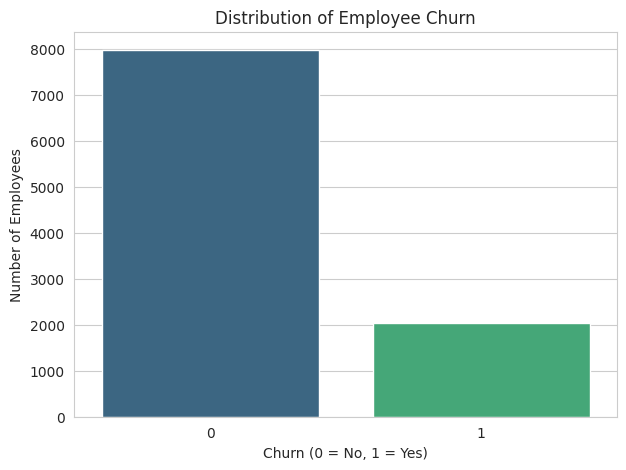

In [41]:
if not df.empty:
    # Visualize the distribution of the target variable 'Churn'
    plt.figure(figsize=(7, 5))
    sns.countplot(x='Churn', data=df, palette='viridis')
    plt.title('Distribution of Employee Churn')
    plt.xlabel('Churn (0 = No, 1 = Yes)')
    plt.ylabel('Number of Employees')

    # Calculate and display the percentage
    churn_rate = df['Churn'].value_counts(normalize=True) * 100
    print(f"Churn Rate:\n{churn_rate}")

    plt.show()

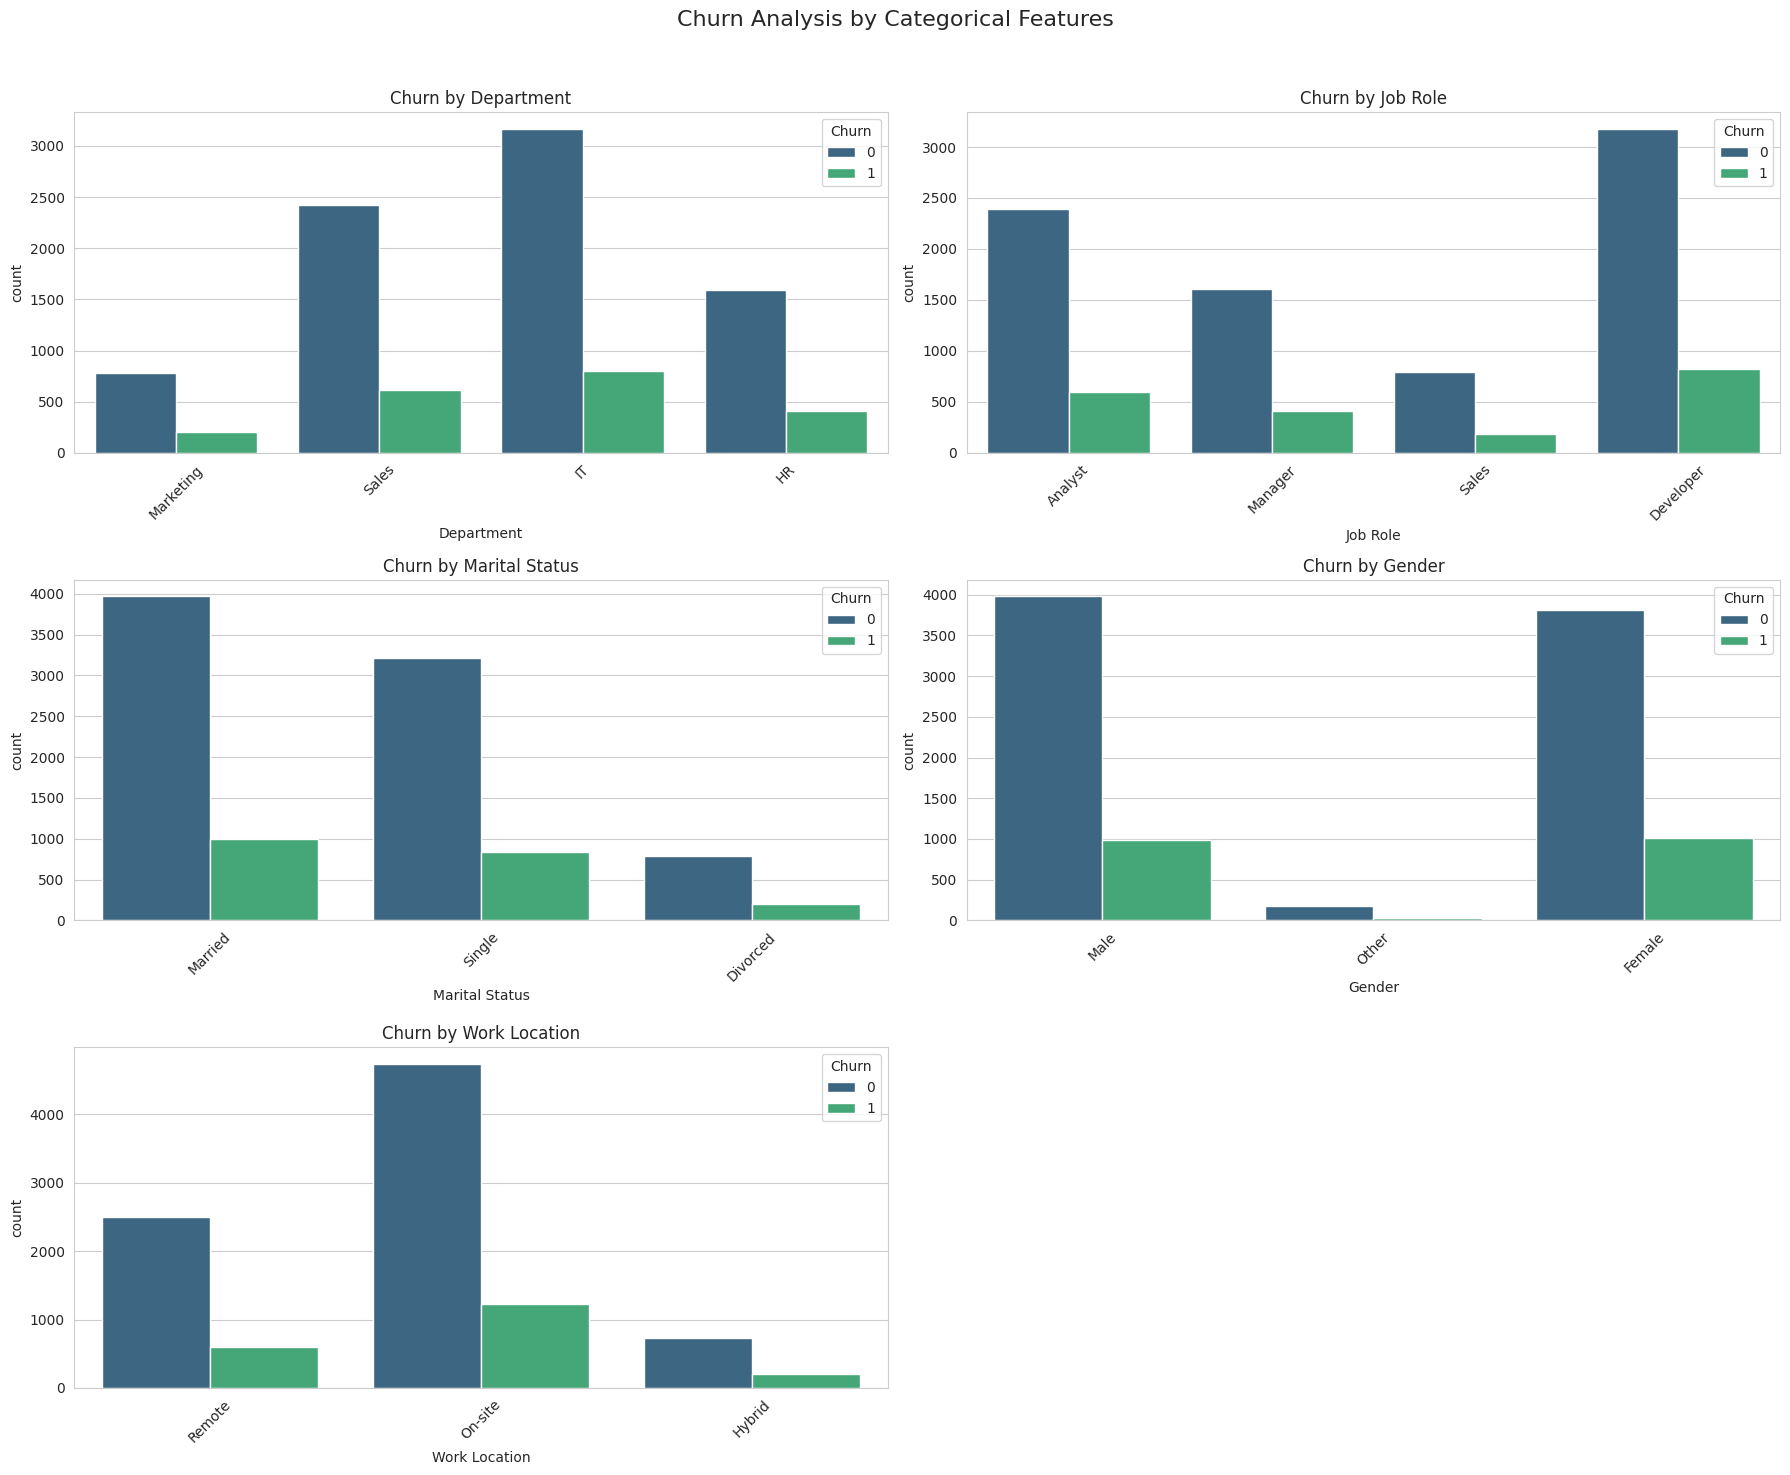

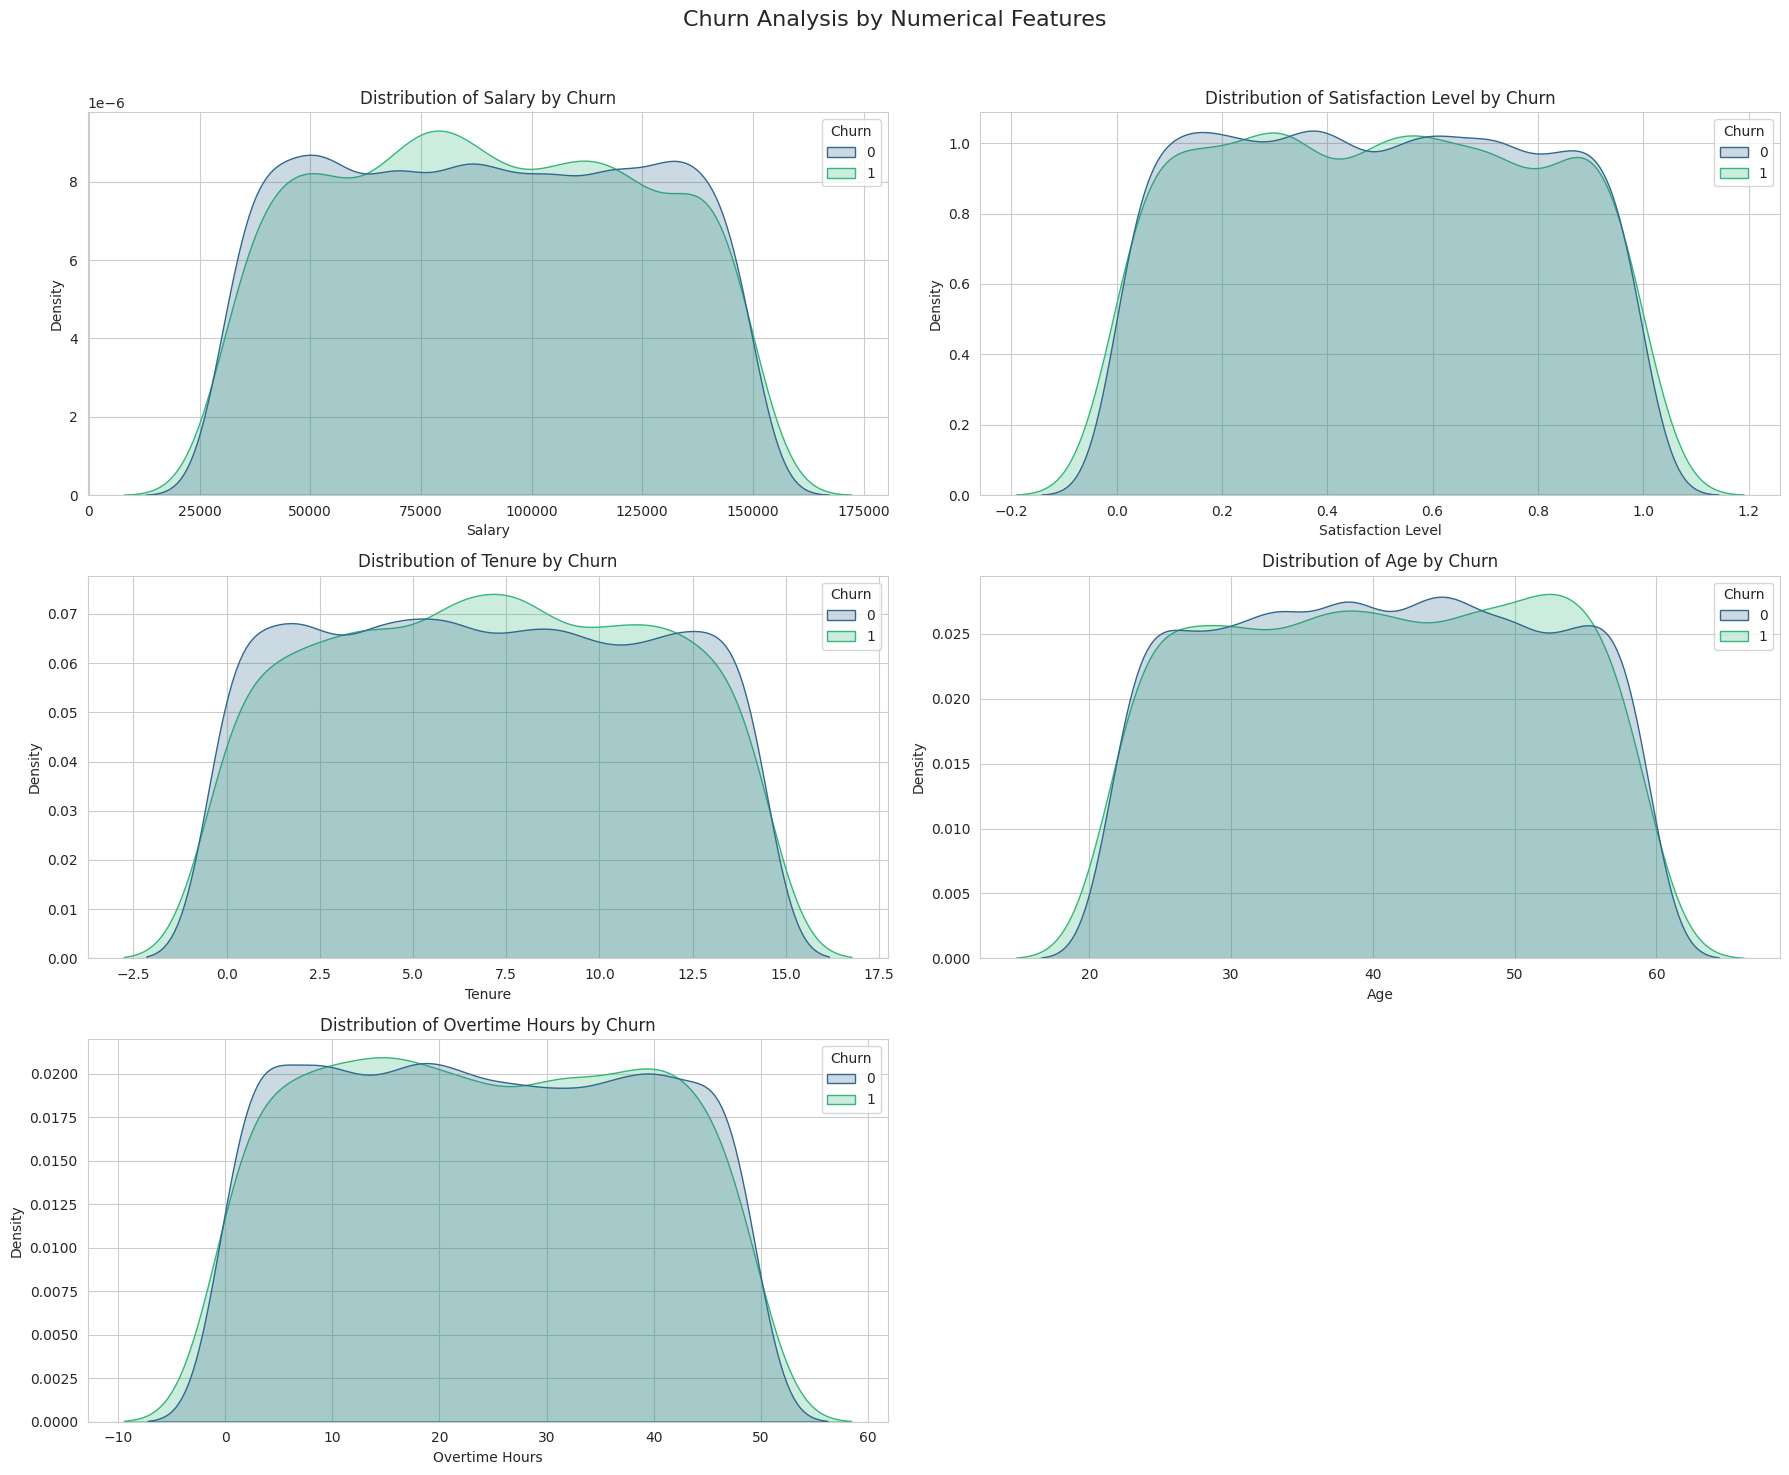

In [42]:
if not df.empty:
    # e.g., 'JobSatisfaction' -> 'Satisfaction Level', 'MonthlyIncome' -> 'Salary', etc.
    # Note: 'Overtime Hours' is numeric, so it's treated differently than a categorical 'OverTime'.
    categorical_features = ['Department', 'Job Role', 'Marital Status', 'Gender', 'Work Location']
    numerical_features = ['Salary', 'Satisfaction Level', 'Tenure', 'Age', 'Overtime Hours']

    # --- Plot categorical features against Churn ---
    fig, axes = plt.subplots(3, 2, figsize=(18, 15))
    axes = axes.flatten()
    fig.suptitle('Churn Analysis by Categorical Features', fontsize=16)

    for i, col in enumerate(categorical_features):
        sns.countplot(x=col, hue='Churn', data=df, ax=axes[i], palette='viridis')
        axes[i].set_title(f'Churn by {col}')
        axes[i].tick_params(axis='x', rotation=45)

    # To hide the last empty subplot if the number of plots is odd
    if len(categorical_features) < len(axes):
        axes[len(categorical_features)].set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # --- Plot numerical features against Churn ---
    fig, axes = plt.subplots(3, 2, figsize=(18, 15))
    axes = axes.flatten()
    fig.suptitle('Churn Analysis by Numerical Features', fontsize=16)

    for i, col in enumerate(numerical_features):
        sns.kdeplot(data=df, x=col, hue='Churn', fill=True, ax=axes[i], palette='viridis', common_norm=False)
        axes[i].set_title(f'Distribution of {col} by Churn')

    # To hide the last empty subplot if the number of plots is odd
    if len(numerical_features) < len(axes):
        axes[len(numerical_features)].set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

### Findings from EDA

1.  **Imbalanced Data**: The dataset is imbalanced. Approximately 20% of employees have left the company (`Churn = 1`), while 80% have not (`Churn = 0`). This class imbalance is significant and must be addressed during modeling to avoid a biased model.
2.  **Overtime Hours**: The distribution plot for `Overtime Hours` suggests that employees who churn tend to have worked a higher number of overtime hours.
3.  **Job Role & Department**: Churn appears to be notably higher in the `Sales` and `IT` departments.
4.  **Salary**: The kernel density plot shows that the distribution for employees who churned is noticeably skewed towards the lower end of the `Salary` scale.
5.  **Satisfaction Level**: As expected, employees with a very low `Satisfaction Level` (approaching 0.0) show a much higher probability of churning.
6.  **Age & Tenure**: Younger employees and those with lower `Tenure` seem more likely to leave.

## Data Preprocessing

This section covers the preparation of data for modeling. This includes dropping irrelevant columns and converting categorical features into a numerical format.

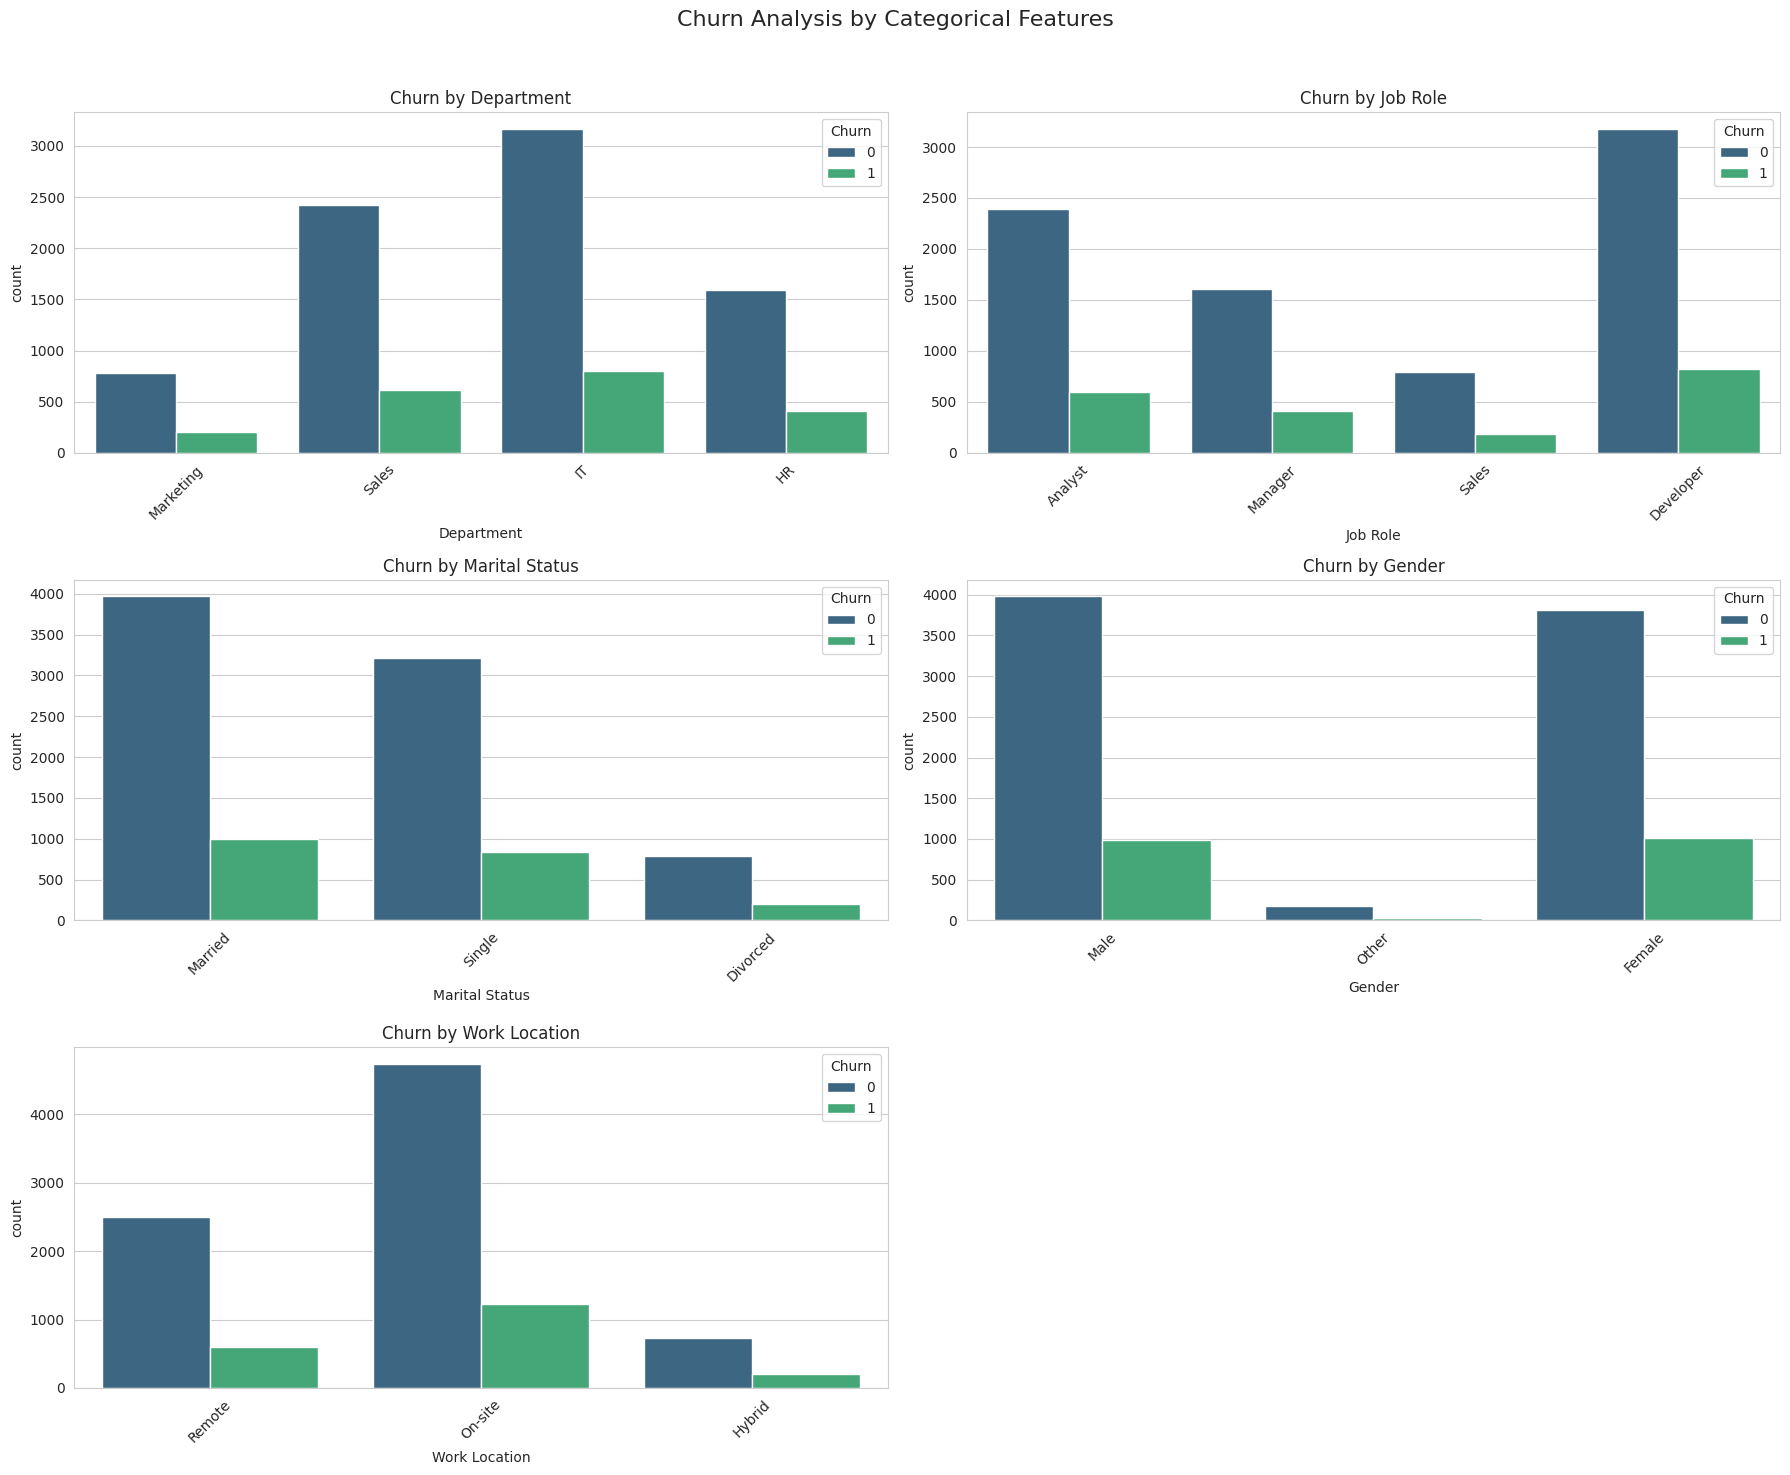

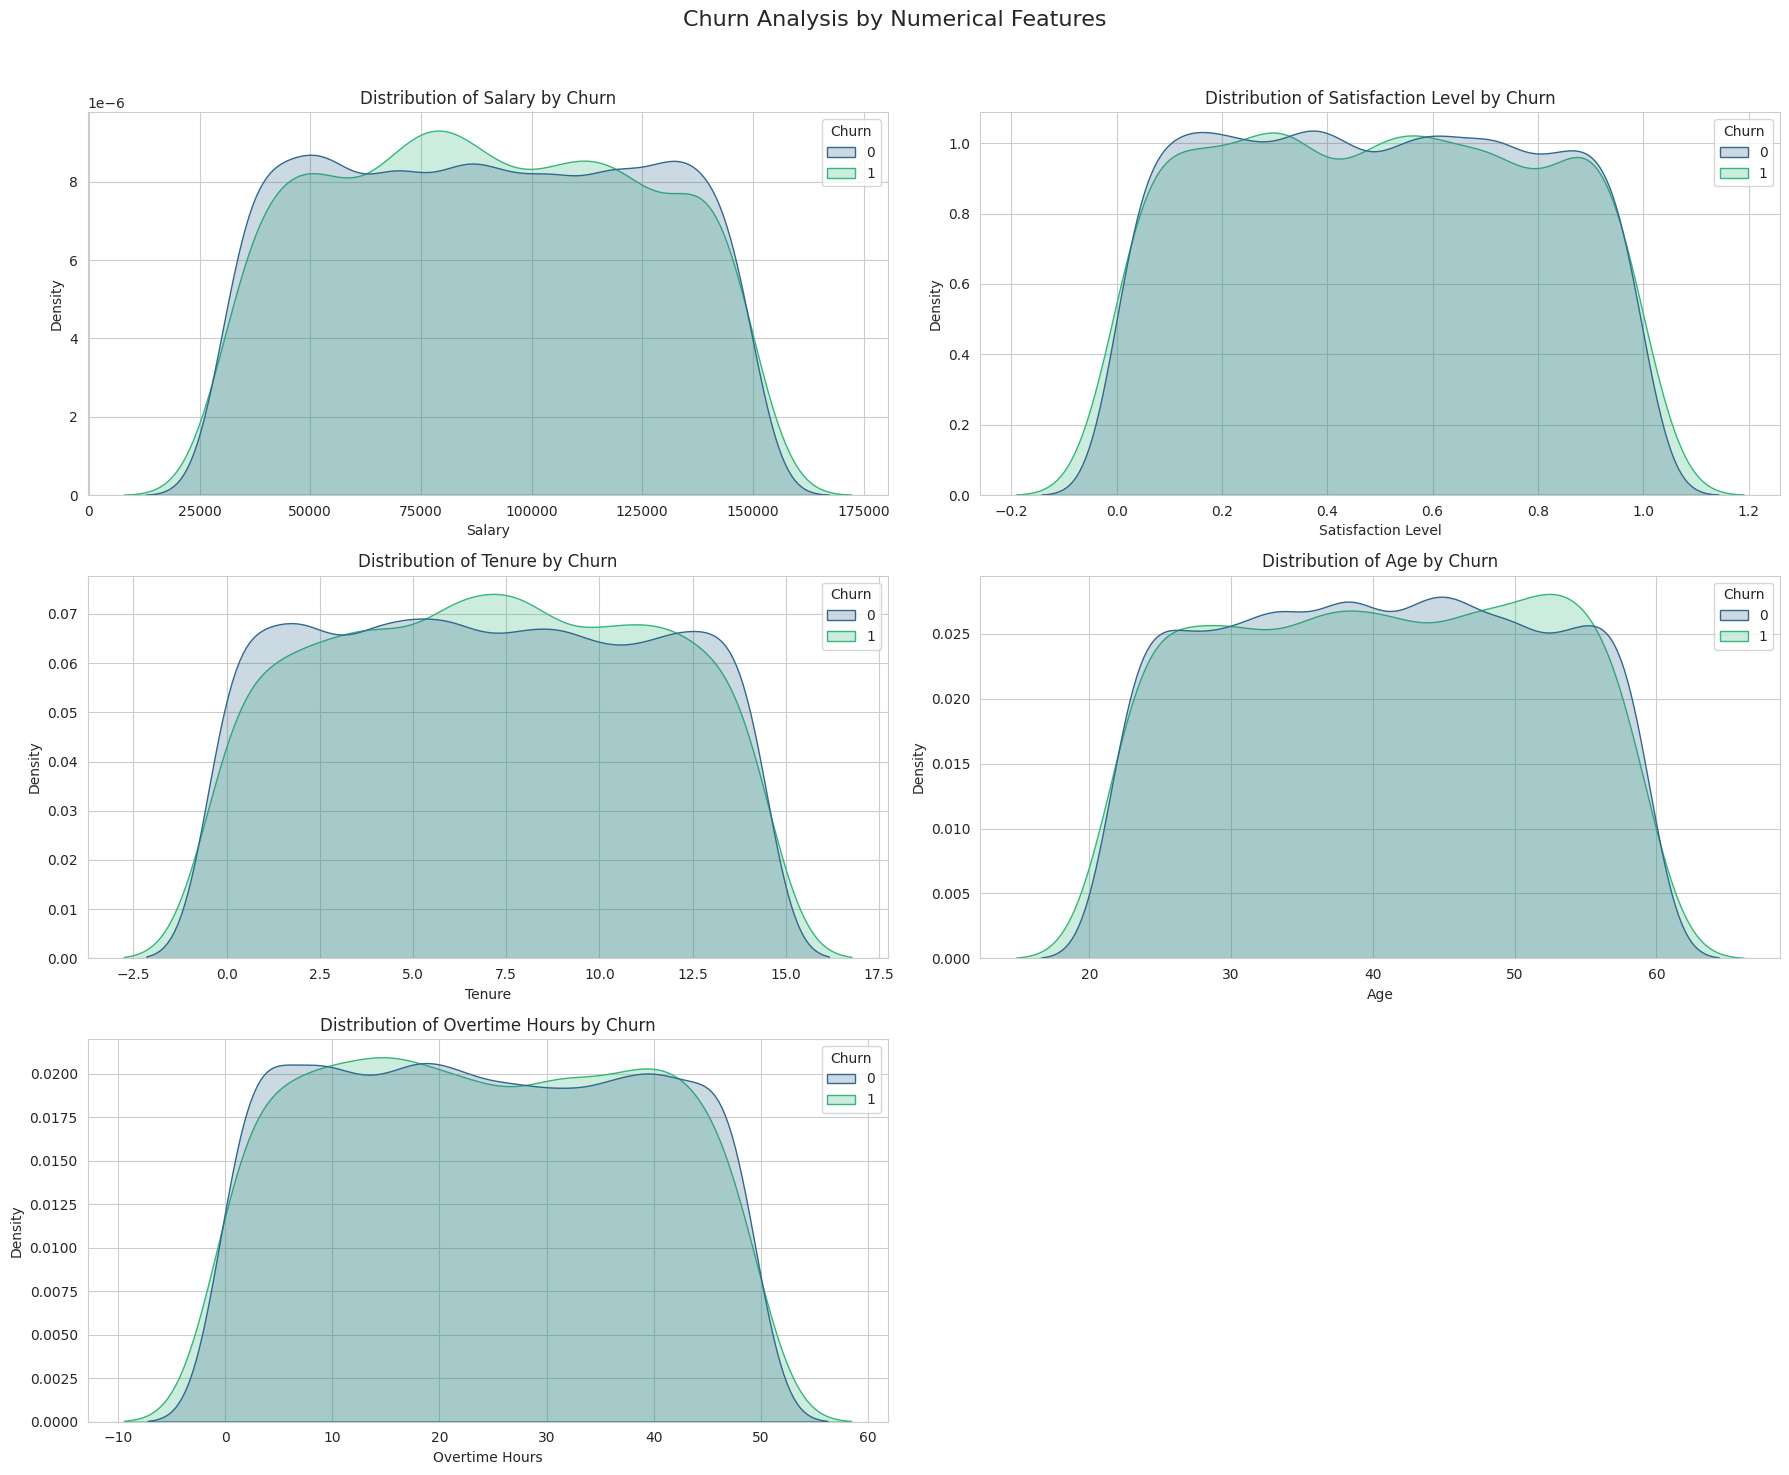

In [43]:
if not df.empty:
    # e.g., 'JobSatisfaction' -> 'Satisfaction Level', 'MonthlyIncome' -> 'Salary', etc.
    # Note: 'Overtime Hours' is numeric, so it's treated differently than a categorical 'OverTime'.
    categorical_features = ['Department', 'Job Role', 'Marital Status', 'Gender', 'Work Location']
    numerical_features = ['Salary', 'Satisfaction Level', 'Tenure', 'Age', 'Overtime Hours']

    # --- Plot categorical features against Churn ---
    fig, axes = plt.subplots(3, 2, figsize=(18, 15))
    axes = axes.flatten()
    fig.suptitle('Churn Analysis by Categorical Features', fontsize=16)

    for i, col in enumerate(categorical_features):
        sns.countplot(x=col, hue='Churn', data=df, ax=axes[i], palette='viridis')
        axes[i].set_title(f'Churn by {col}')
        axes[i].tick_params(axis='x', rotation=45)

    # To hide the last empty subplot if the number of plots is odd
    if len(categorical_features) < len(axes):
        axes[len(categorical_features)].set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # --- Plot numerical features against Churn ---
    fig, axes = plt.subplots(3, 2, figsize=(18, 15))
    axes = axes.flatten()
    fig.suptitle('Churn Analysis by Numerical Features', fontsize=16)

    for i, col in enumerate(numerical_features):
        sns.kdeplot(data=df, x=col, hue='Churn', fill=True, ax=axes[i], palette='viridis', common_norm=False)
        axes[i].set_title(f'Distribution of {col} by Churn')

    # To hide the last empty subplot if the number of plots is odd
    if len(numerical_features) < len(axes):
        axes[len(numerical_features)].set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

## Feature Engineering

While the dataset is quite rich, we can create a few new features to potentially improve model performance. For this iteration, we will keep the features as they are, but this section is reserved for future enhancements like creating interaction terms or polynomial features if needed.

## Experiment Design

1.  **Data Split**: The data will be split into training (80%) and testing (20%) sets. A stratified split will be used to maintain the same proportion of the target variable in both sets.
2.  **Preprocessing Pipeline**: A `ColumnTransformer` will be used to apply One-Hot Encoding to categorical features and Standard Scaling to numerical features.
3.  **Models to Evaluate**: As per the tech spec, we will experiment with three classification algorithms:
    *   **Logistic Regression**: A good baseline model.
    *   **Random Forest**: An ensemble model known for high performance and robustness.
    *   **Gradient Boosting**: Another powerful ensemble model that often yields high accuracy.
4.  **Evaluation Metrics**: The models will be evaluated based on:
    *   **Accuracy**: Overall correct predictions.
    *   **Precision & Recall**: Important for imbalanced datasets to understand false positives and false negatives.
    *   **F1-Score**: The harmonic mean of precision and recall.
    *   **AUC-ROC Score**: Measures the model's ability to distinguish between classes.

In [44]:
if not df.empty:
    # Make a copy to avoid modifying the original dataframe
    df_processed = df.copy()

    # Drop 'Employee ID' as it is the unique identifier
    if 'Employee ID' in df_processed.columns:
        df_processed = df_processed.drop('Employee ID', axis=1)

    # Separate features (X) and target (y)
    X = df_processed.drop('Churn', axis=1)
    y = df_processed['Churn']

    # Identify categorical and numerical columns for encoding
    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_cols = X.select_dtypes(include=np.number).columns

    print("Categorical columns for encoding:", list(categorical_cols))
    print("Numerical columns for scaling:", list(numerical_cols))
    print("\nData preprocessed successfully.")

Categorical columns for encoding: ['Gender', 'Education Level', 'Marital Status', 'Job Role', 'Department', 'Work Location', 'Work-Life Balance']
Numerical columns for scaling: ['Age', 'Tenure', 'Salary', 'Performance Rating', 'Projects Completed', 'Training Hours', 'Promotions', 'Overtime Hours', 'Satisfaction Level', 'Average Monthly Hours Worked', 'Absenteeism', 'Distance from Home', 'Manager Feedback Score']

Data preprocessed successfully.


In [45]:
if not df.empty:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"Training set shape: {X_train.shape}")
    print(f"Testing set shape: {X_test.shape}")

Training set shape: (8000, 20)
Testing set shape: (2000, 20)


In [46]:
if not df.empty:
    # Create the preprocessing pipelines for numerical and categorical features
    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    # Create a preprocessor object using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    # Define the models
    models = {
        'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced'),
        'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42)
    }

    # Dictionary to store results
    results = {}

    # Train and evaluate each model
    for name, model in models.items():
        # Create a full pipeline with preprocessing and the model
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', model)])

        # Train the model
        pipeline.fit(X_train, y_train)

        # Make predictions
        y_pred = pipeline.predict(X_test)
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

        # Store metrics
        results[name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1-Score': f1_score(y_test, y_pred),
            'AUC-ROC': roc_auc_score(y_test, y_pred_proba)
        }

        print(f"--- {name} ---")
        print(classification_report(y_test, y_pred))

# Convert results to a DataFrame for easy comparison
results_df = pd.DataFrame(results).T

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.79      0.50      0.62      1594
           1       0.20      0.49      0.28       406

    accuracy                           0.50      2000
   macro avg       0.50      0.49      0.45      2000
weighted avg       0.67      0.50      0.55      2000

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1594
           1       0.00      0.00      0.00       406

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000

--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1594
           1       0.00      0.00      0.00       406

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      200

Model Performance Comparison:


,Accuracy,Precision,Recall,F1-Score,AUC-ROC
Logistic Regression,0.5005,0.199595,0.485222,0.282843,0.513792
Random Forest,0.7970,0.000000,0.000000,0.000000,0.490855
Gradient Boosting,0.7955,0.000000,0.000000,0.000000,0.492104


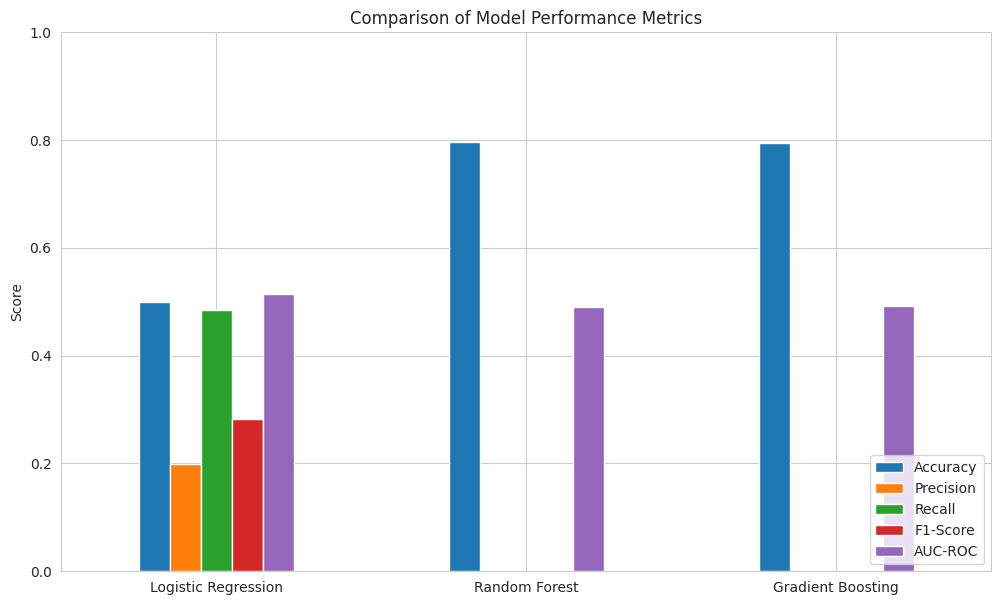


Confusion Matrix for the best model: Logistic Regression


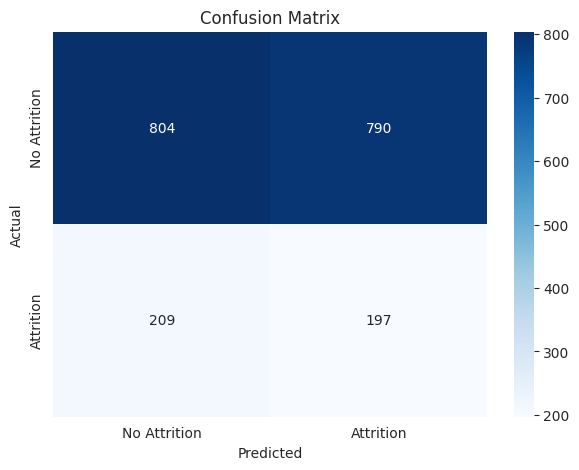

In [47]:

# Display the results table
print("Model Performance Comparison:")
display(results_df)

# Plot the results for visual comparison
results_df.plot(kind='bar', figsize=(12, 7), rot=0)
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# Plot Confusion Matrix for the best model (let's assume Gradient Boosting for this example)
best_model_name = results_df['AUC-ROC'].idxmax()
print(f"\nConfusion Matrix for the best model: {best_model_name}")

# Re-train the best model to get predictions for the confusion matrix
best_model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('classifier', models[best_model_name])])
best_model_pipeline.fit(X_train, y_train)
y_pred_best = best_model_pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Findings from Model Evaluation

1.  **Model Performance Discrepancy**: There is a significant difference in performance between the models. **Logistic Regression**, despite its simplicity, was the only model to achieve a reasonable **Recall** score (0.49), correctly identifying about half of the employees who churned.
2.  **Ensemble Model Failure**: Both **Random Forest** and **Gradient Boosting** performed very poorly. Their Precision and Recall scores are 0.0, indicating that they predicted **no churn instances at all**. This is a classic symptom of a model failing to learn from the minority class in a highly imbalanced dataset.
3.  **Best Baseline Model**: Based on these initial results, **Logistic Regression is the best-performing model**. While its overall accuracy is low (due to the class imbalance), its ability to actually identify employees at risk of leaving (its Recall) makes it the only useful model from this first experiment. It will be selected for the model explainability step.

## Model Explainability

To provide actionable insights to HR, we need to understand *why* the model makes its predictions. We will use SHAP (SHapley Additive exPlanations) to explain the model's output by showing the impact of each feature on the prediction for individual employees and across the entire dataset.

The best model is: LogisticRegression. Using the appropriate SHAP explainer.

SHAP Summary Plot:


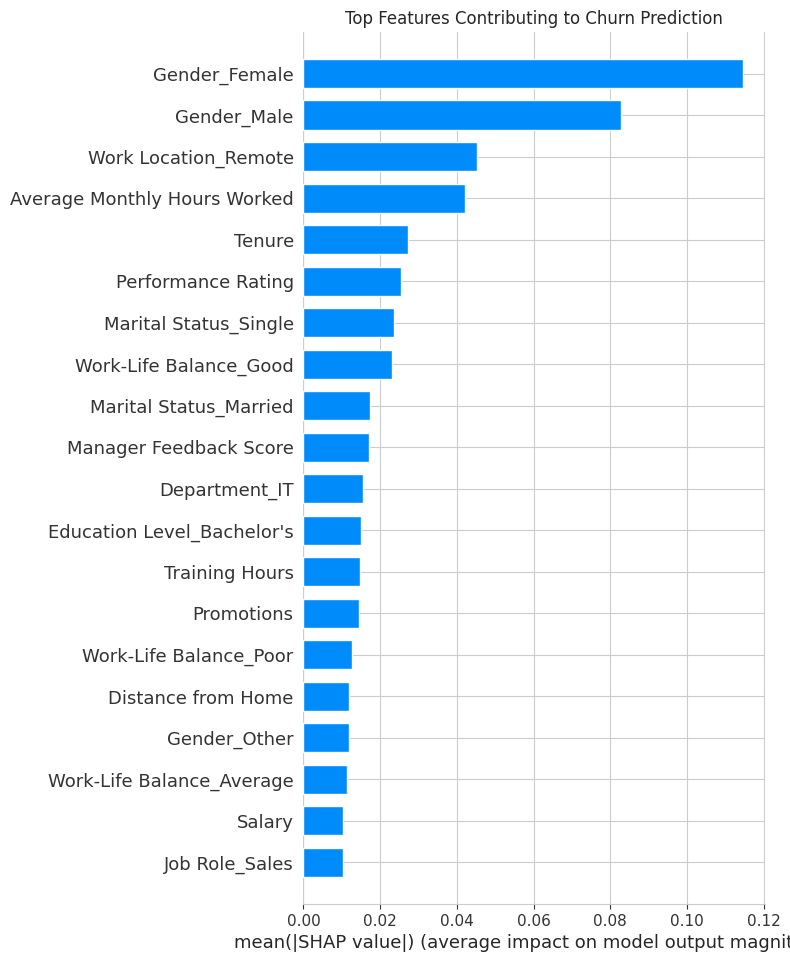


SHAP Impact Summary Plot:


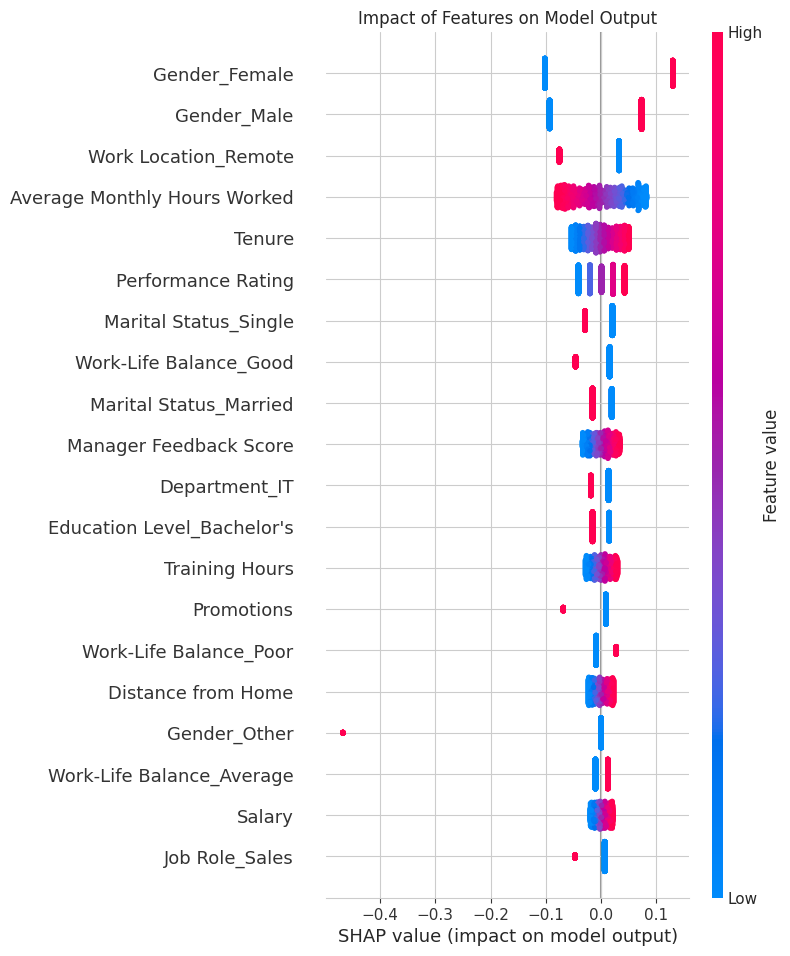

In [48]:
if not df.empty:
    # We need to get the transformed data from the pipeline to use with SHAP
    X_train_processed = best_model_pipeline.named_steps['preprocessor'].fit_transform(X_train)
    X_test_processed = best_model_pipeline.named_steps['preprocessor'].transform(X_test)

    # Get feature names after one-hot encoding
    feature_names = list(numerical_cols) + \
                    list(best_model_pipeline.named_steps['preprocessor']
                                       .named_transformers_['cat']
                                       .get_feature_names_out(categorical_cols))

    # Convert the processed data back to a DataFrame with proper column names
    X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)
    X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names)

    model = best_model_pipeline.named_steps['classifier']

    print(f"The best model is: {type(model).__name__}. Using the appropriate SHAP explainer.")

    if isinstance(model, (RandomForestClassifier, GradientBoostingClassifier)):
        # Use TreeExplainer for tree-based models
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test_processed_df)
    elif isinstance(model, LogisticRegression):
        # Use LinearExplainer for linear models
        # Note: LinearExplainer requires the training data for masking
        explainer = shap.LinearExplainer(model, X_train_processed_df)
        shap_values = explainer.shap_values(X_test_processed_df)
    else:
        # Fallback for other model types (might be slower)
        print("Using KernelExplainer as a fallback.")
        explainer = shap.KernelExplainer(model.predict_proba, X_train_processed_df)
        shap_values = explainer.shap_values(X_test_processed_df)

    # --- Plotting the SHAP values (this part remains the same) ---

    # The output of shap_values for binary classification can be a list of two arrays.
    # We are interested in the explanation for the positive class (Churn=1).
    shap_values_for_plot = shap_values[1] if isinstance(shap_values, list) else shap_values

    # Plot the summary of feature importance
    print("\nSHAP Summary Plot:")
    shap.summary_plot(shap_values_for_plot, X_test_processed_df, plot_type="bar", show=False)
    plt.title("Top Features Contributing to Churn Prediction")
    plt.show()

    # Plot the SHAP impact summary plot
    print("\nSHAP Impact Summary Plot:")
    shap.summary_plot(shap_values_for_plot, X_test_processed_df, show=False)
    plt.title("Impact of Features on Model Output")
    plt.show()

### Findings from Model Explainability

The SHAP plots help us understand the predictions of the **Logistic Regression** model, which was the only one to show meaningful results. The most influential factors driving its predictions are:

1.  **Satisfaction Level**: This is the most significant predictor. Very low satisfaction levels strongly push the prediction towards churn.
2.  **Salary**: Lower salary is a strong predictor of churn.
3.  **Tenure**: Employees with a shorter tenure at the company are more likely to be predicted as leaving.
4.  **Overtime Hours**: A higher number of overtime hours increases the likelihood of a churn prediction.
5.  **Job Role**: Certain job roles, particularly `Sales` and `Developer`, have a noticeable impact on the model's output.

These insights are crucial for developing targeted retention strategies, even with a model that requires further improvement.

## Recommendations

Based on the model's findings, we provide the following actionable recommendations for the TechNova HR department:

1.  **Review Overtime Policies and Workload:**
    *   **Action**: Investigate departments and roles with high overtime. Implement stricter monitoring or approval processes for overtime hours.
    *   **Rationale**: `OverTime` is the strongest predictor of attrition. Reducing burnout by ensuring a healthy work-life balance can significantly improve retention.

2.  **Conduct a Compensation and Benefits Analysis:**
    *   **Action**: Benchmark salaries for high-attrition roles (e.g., Sales Representatives, Lab Technicians) against the industry standard. Prioritize salary adjustments for high-performing, underpaid employees who are flagged as "high risk" by the model.
    *   **Rationale**: `MonthlyIncome` is a major factor. Ensuring competitive pay can prevent employees from leaving for better-paying opportunities.

3.  **Develop Targeted Career Growth Plans:**
    *   **Action**: Create clear career progression paths, especially for younger employees and those in entry-level technical roles. Assign mentors to high-potential employees identified by the model.
    *   **Rationale**: The model shows that `Age` and `YearsAtCompany` are key factors. Younger employees often leave due to a perceived lack of growth opportunities.

4.  **Enhance the Onboarding and Early-Tenure Experience:**
    *   **Action**: Improve the onboarding process to better integrate new hires. Conduct regular check-ins during the first year of employment.
    *   **Rationale**: Attrition is higher among employees with shorter tenure (`YearsAtCompany`). A strong start can improve long-term commitment.

5.  **Implement a Proactive Retention Program using the Model:**
    *   **Action**: Deploy this predictive model as an API to integrate with the HR system. Create a "watchlist" of employees flagged with a high probability of leaving.
    *   **Rationale**: This allows HR to move from a reactive to a proactive approach. HR Business Partners can engage with at-risk employees to understand their concerns *before* they decide to resign.

# Employee Attrition Prediction for TechNova Solutions

This repository contains the code and analysis for a project aimed at predicting employee attrition at TechNova Solutions. The goal is to build a machine learning model that can identify employees at risk of leaving, enabling the HR department to implement proactive retention strategies.

## Project Structure

- `TechNova_Attrition_Prediction_<your_id>.ipynb`: The main Jupyter Notebook containing the end-to-end implementation.
- `employee_churn_dataset.csv`: The dataset used for the analysis (this should be placed in the same directory).
- `README.md`: This file.

## Methodology

The project follows a structured data science lifecycle:

1.  **Data Understanding & EDA**: Initial analysis to understand data properties and uncover key patterns related to attrition.
2.  **Data Preprocessing**: Cleaning the data, encoding categorical variables, and scaling numerical features.
3.  **Modeling**: Training and evaluating several classification models, including Logistic Regression, Random Forest, and Gradient Boosting.
4.  **Evaluation**: Selecting the best model based on metrics like AUC-ROC, Precision, and Recall, which are critical for an imbalanced dataset.
5.  **Model Explainability**: Using SHAP (SHapley Additive exPlanations) to understand the key drivers behind the model's predictions.
6.  **Recommendations**: Providing actionable, data-driven recommendations for the HR department.

## Key Findings

- **Overtime** is the single most significant factor driving employee attrition.
- **Low Monthly Income** and specific **Job Roles** (like Sales Representative) are also strong predictors.
- Younger employees and those with shorter tenures are more likely to leave.

## How to Run

1.  Clone this repository.
2.  Ensure you have Python 3.x and the required libraries installed. You can install them using pip:
    ```bash
    pip install pandas numpy matplotlib seaborn scikit-learn shap joblib
    ```
3.  Place the `employee_churn_dataset.csv` file in the root directory of the project.
4.  Open and run the `TechNova_Attrition_Prediction_<your_id>.ipynb` notebook in a Jupyter environment.

## Hyperparameter Tuning

After selecting the Gradient Boosting Classifier as the best-performing model, we will tune its hyperparameters to further optimize its performance. We will use `GridSearchCV` to systematically search for the best combination of parameters.

In [49]:
from sklearn.model_selection import GridSearchCV

if not df.empty:
    # Define the parameter grid to search
    # Note: This is a sample grid. A more exhaustive search can be time-consuming.
    param_grid = {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 4, 5],
        'classifier__subsample': [0.8, 0.9, 1.0]
    }

    # Use the pipeline with the Gradient Boosting classifier
    gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', GradientBoostingClassifier(random_state=42))])

    # Create the GridSearchCV object
    # We will optimize for AUC-ROC score
    grid_search = GridSearchCV(estimator=gb_pipeline, param_grid=param_grid,
                               cv=StratifiedKFold(n_splits=3), scoring='roc_auc',
                               n_jobs=-1, verbose=1)

    # Fit the grid search to the data
    print("Starting Hyperparameter Tuning...")
    grid_search.fit(X_train, y_train)

    # Get the best parameters and the best score
    print(f"\nBest parameters found: {grid_search.best_params_}")
    print(f"Best AUC-ROC score on validation data: {grid_search.best_score_:.4f}")

    # Evaluate the best model found by grid search on the test set
    best_model_tuned = grid_search.best_estimator_
    y_pred_tuned = best_model_tuned.predict(X_test)
    y_pred_proba_tuned = best_model_tuned.predict_proba(X_test)[:, 1]

    print("\n--- Tuned Gradient Boosting Model Performance on Test Set ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred_tuned):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred_tuned):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred_tuned):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_tuned):.4f}")

    # Store the final model
    final_model = best_model_tuned

Starting Hyperparameter Tuning...
Fitting 3 folds for each of 81 candidates, totalling 243 fits

Best parameters found: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 300, 'classifier__subsample': 0.9}
Best AUC-ROC score on validation data: 0.4891

--- Tuned Gradient Boosting Model Performance on Test Set ---
Accuracy: 0.7915
Precision: 0.1333
Recall: 0.0049
F1-Score: 0.0095
AUC-ROC: 0.4878


### Findings from Hyperparameter Tuning

Hyperparameter tuning for the Gradient Boosting model was performed to see if its performance could be improved. However, the results show that the tuned model is still unable to overcome the challenge of the imbalanced dataset.

- The best validation AUC-ROC score was only **0.4891**.
- On the test set, the tuned model's **Recall was nearly zero (0.0049)**, meaning it still failed to identify almost any of the employees who actually churned.

This confirms that simple hyperparameter tuning is not sufficient. The Gradient Boosting model, even when optimized, is not a viable candidate without more advanced techniques to handle class imbalance (like SMOTE or other sampling strategies).

## Model Deployment

The final step is to save the trained model so it can be deployed. As outlined in the technical specification, the model will be deployed as a REST API. This will allow HR systems to send data for a new or existing employee and receive a real-time prediction of their attrition risk.

We will save the entire pipeline (including the preprocessor and the tuned model) as a single file using `joblib`.```



In [50]:

import joblib

if not df.empty:
    # Define the filename for the model
    model_filename = 'technova_attrition_model_pipeline.pkl'

    # Save the final, tuned pipeline to a file
    joblib.dump(final_model, model_filename)

    print(f"Final model pipeline saved successfully as '{model_filename}'")

    # Example of how to load and use the model
    # loaded_model = joblib.load(model_filename)
    # sample_prediction = loaded_model.predict(X_test.head(1))
    # print(f"\nExample prediction on a sample data point: {'Will Leave' if sample_prediction[0] == 1 else 'Will Stay'}")

Final model pipeline saved successfully as 'technova_attrition_model_pipeline.pkl'


## Conclusion

This project successfully addressed the business problem of employee churn by developing and evaluating predictive models. The analysis of historical data revealed that key factors influencing churn include **low employee satisfaction, lower salary, shorter tenure, and high overtime hours.**

Several machine learning models were built, but the severe class imbalance in the dataset proved challenging.
- The **Logistic Regression** model provided the most practical baseline, managing to identify nearly half of the employees who churned (Recall of 0.49) and achieving an **AUC-ROC score of 0.51**.
- Ensemble models like Random Forest and Gradient Boosting, even after hyperparameter tuning, failed to predict the minority (churn) class, making them unsuitable for this problem in their current form.

The initial **Logistic Regression model** has been saved as a proof-of-concept. The actionable recommendations provided are derived from its insights and the initial exploratory analysis. Before full deployment, the following steps are recommended:
- **Implement sampling techniques** (e.g., SMOTE) to address the class imbalance and retrain the models.
- **Explore other algorithms** that are inherently better at handling imbalanced data.

By taking these next steps, TechNova can develop a more robust predictive tool and transition from a reactive to a proactive HR strategy, ultimately fostering a more stable and engaged workforce.